## Import Library

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os


## Load Dataset

In [39]:
file_path = "heart_disease_uci.csv"
print(f"Mencoba memuat dataset dari: {file_path}")
df = None
model_filename = None

try:
    df = pd.read_csv(file_path, na_values='?')
    print("Dataset berhasil dimuat.")
    print(f"Jumlah baris awal: {len(df)}, Jumlah kolom awal: {len(df.columns)}")
    print(df.head())
except FileNotFoundError:
    print(f"ERROR: FileNotFoundError. File '{file_path}' tidak ditemukan.")
    exit()
except Exception as e:
    print(f"Error saat memuat dataset: {e}")
    exit()

Mencoba memuat dataset dari: heart_disease_uci.csv
Dataset berhasil dimuat.
Jumlah baris awal: 920, Jumlah kolom awal: 16
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0 

In [40]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## EDA

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Pengaturan untuk tampilan plot yang lebih baik
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12


Melanjutkan EDA dengan DataFrame 'df' yang sudah ada...

--- Menangani dan Memvisualisasikan Nilai yang Hilang ---
Informasi nilai yang hilang:
          Jumlah Hilang  Persentase Hilang (%)
ca                  611              66.413043
thal                486              52.826087
slope               309              33.586957
fbs                  90               9.782609
oldpeak              62               6.739130
trestbps             59               6.413043
exang                55               5.978261
thalch               55               5.978261
chol                 30               3.260870
restecg               2               0.217391


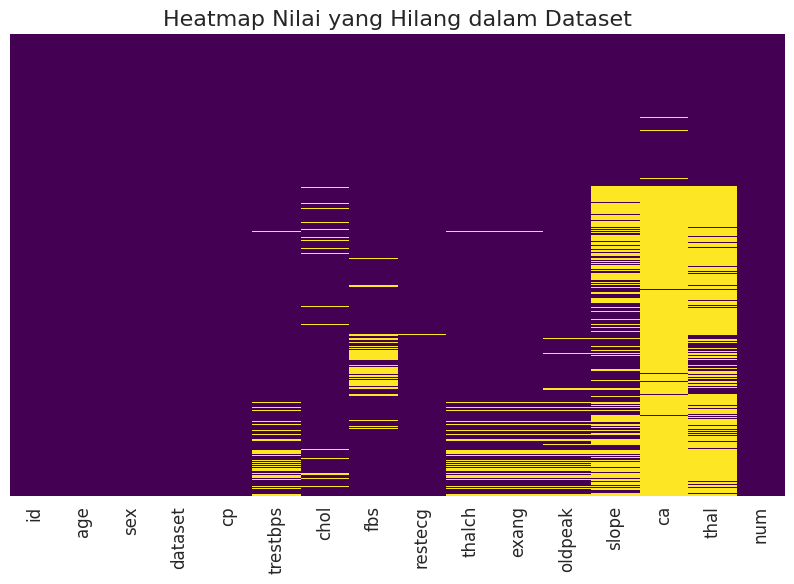

In [42]:
# Pastikan df ada sebelum melanjutkan
if 'df' not in locals() or df is None:
    print("ERROR DataFrame 'df' tidak terdefinisi atau None.")
    print("Harap muat dan proses DataFrame 'df' sebelum menjalankan bagian EDA ini.")
else:
    print("Melanjutkan EDA dengan DataFrame 'df' yang sudah ada...")

    # Memvisualisasikan nilai yang hilang
    print("\n--- Menangani dan Memvisualisasikan Nilai yang Hilang ---")
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_info = pd.DataFrame({'Jumlah Hilang': missing_values, 'Persentase Hilang (%)': missing_percentage})
    missing_info = missing_info[missing_info['Jumlah Hilang'] > 0].sort_values(by='Persentase Hilang (%)', ascending=False)
    print("Informasi nilai yang hilang:")
    print(missing_info)

    if not missing_info.empty:
        plt.figure(figsize=(10, 6))
        sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
        plt.title('Heatmap Nilai yang Hilang dalam Dataset')
        plt.show()
    else:
        print("\nTidak ada nilai yang hilang dalam dataset (berdasarkan pengecekan saat ini).")


Pada tahap ini, kita memeriksa dan memvisualisasikan jumlah nilai yang hilang dalam dataset. Jika ada nilai yang hilang, akan ditampilkan dengan heatmap, agar kita bisa memutuskan apakah perlu melakukan imputasi atau penghapusan.

Distribusi nilai pada kolom 'num' (target asli):
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Kolom 'target' biner telah dibuat.

Distribusi nilai pada kolom 'target' (biner):
target
0    411
1    509
Name: count, dtype: int64


<ipython-input-43-41231984c55d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='pastel')


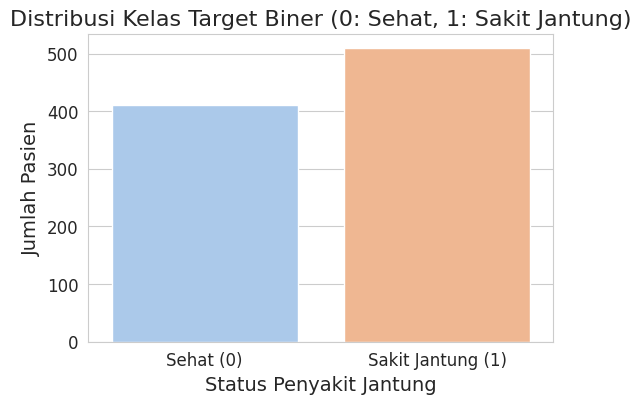

In [43]:
if 'num' in df.columns:
    print("Distribusi nilai pada kolom 'num' (target asli):")
    print(df['num'].value_counts(dropna=False).sort_index())

    # Membuat kolom target biner jika belum ada
    if 'target' not in df.columns:
        df['target'] = df['num'].apply(lambda x: 1 if pd.notna(x) and x > 0 else 0)
        print("\nKolom 'target' biner telah dibuat.")

    print("\nDistribusi nilai pada kolom 'target' (biner):")
    print(df['target'].value_counts(dropna=False).sort_index())

    plt.figure(figsize=(6, 4))
    sns.countplot(x='target', data=df, palette='pastel')
    plt.title('Distribusi Kelas Target Biner (0: Sehat, 1: Sakit Jantung)')
    plt.xlabel('Status Penyakit Jantung')
    plt.ylabel('Jumlah Pasien')
    plt.xticks([0, 1], ['Sehat (0)', 'Sakit Jantung (1)'])
    plt.show()
else:
    print("Kolom 'num' tidak ditemukan. Tidak dapat membuat atau menganalisis variabel target 'num'.")



--- Analisis Univariat ---

Identifikasi Fitur Numerik untuk EDA: ['age', 'chol', 'thalach']
Identifikasi Fitur Kategorikal untuk EDA: ['sex', 'cp']

Distribusi Fitur Numerik:


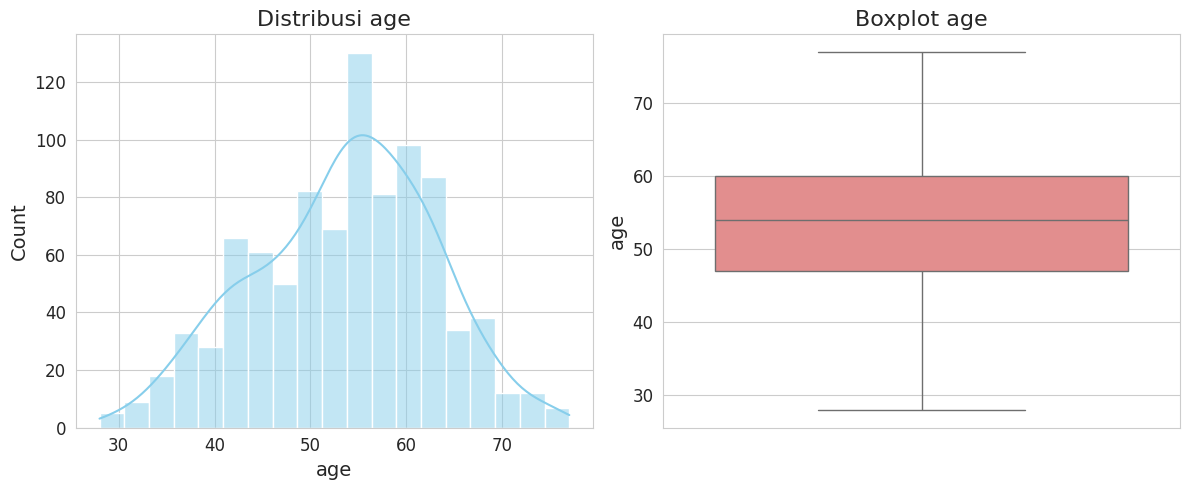

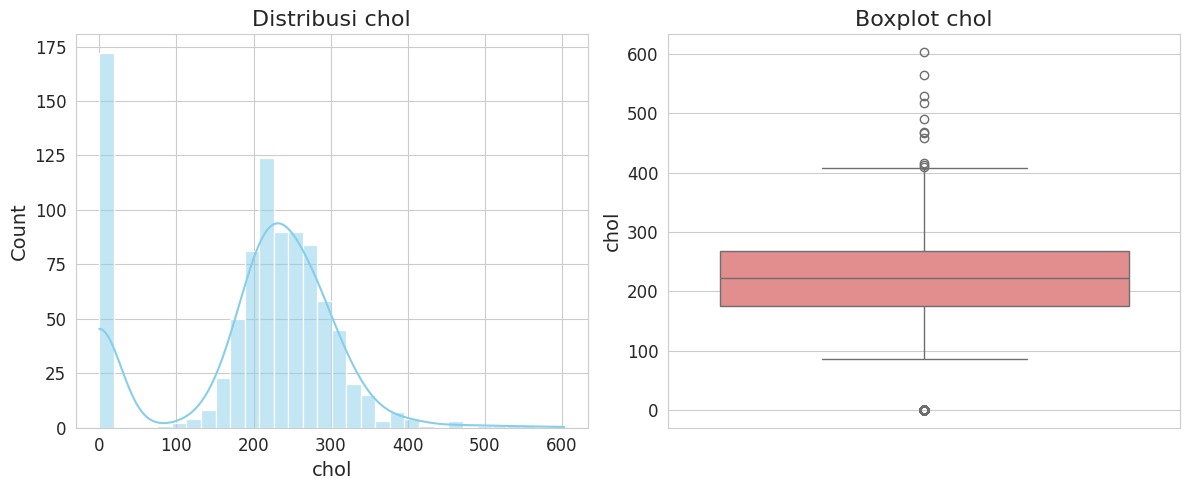


Distribusi Fitur Kategorikal:


<ipython-input-44-321362cf8c19>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', order=order)


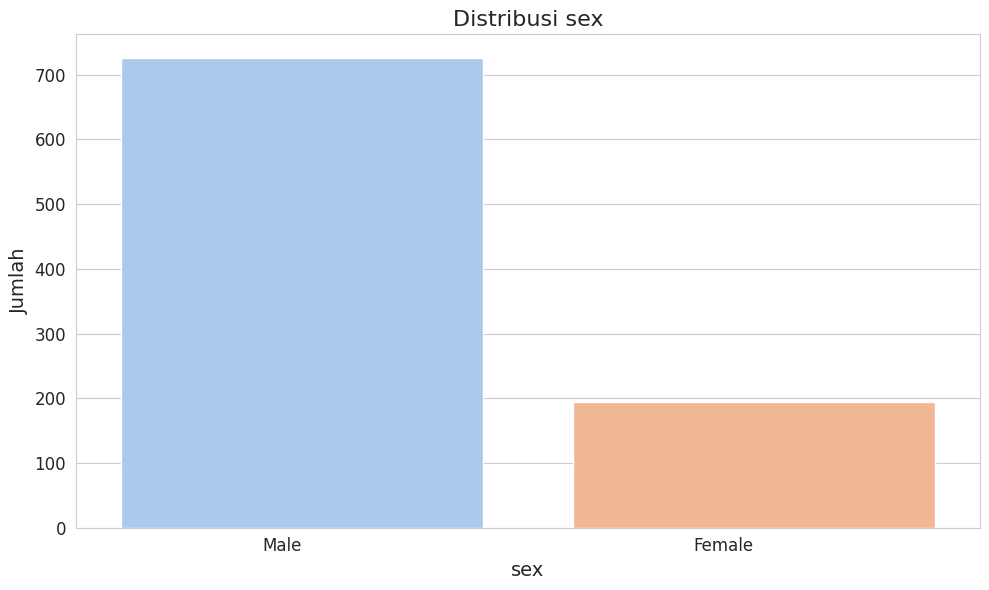

<ipython-input-44-321362cf8c19>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', order=order)


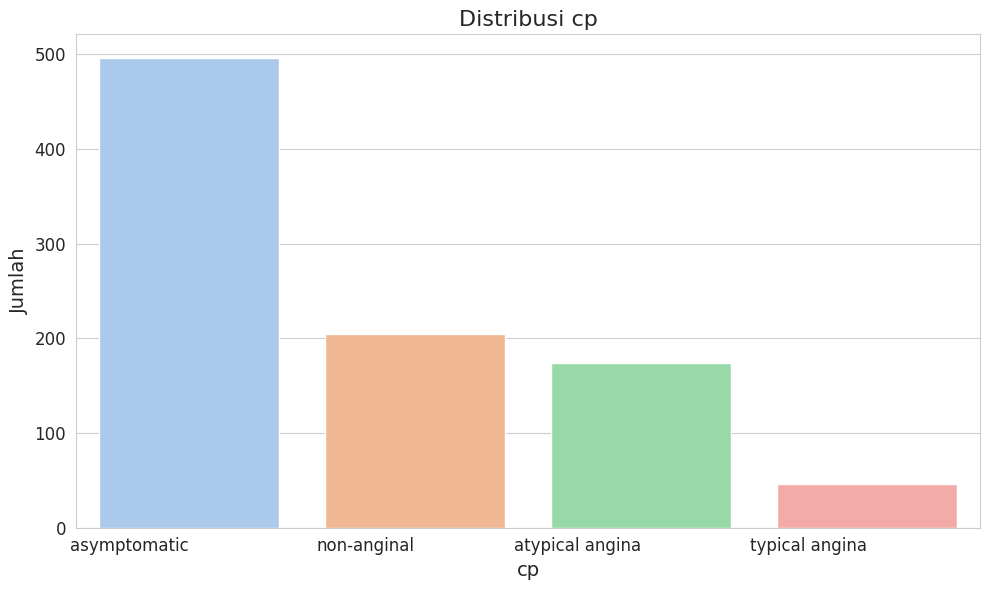

In [44]:
print("\n--- Analisis Univariat ---")

# Tentukan fitur numerik dan kategorikal yang ingin dianalisis
numerical_features_eda = ['age', 'chol', 'thalach']  # Fitur numerik yang ingin dianalisis
categorical_features_eda = ['sex', 'cp']  # Fitur kategorikal yang ingin dianalisis

print(f"\nIdentifikasi Fitur Numerik untuk EDA: {numerical_features_eda}")
print(f"Identifikasi Fitur Kategorikal untuk EDA: {categorical_features_eda}")

# Distribusi Fitur Numerik
if numerical_features_eda:
    print("\nDistribusi Fitur Numerik:")
    for col in numerical_features_eda:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            sns.histplot(df[col].dropna(), kde=True, color='skyblue') # dropna() untuk histplot
            plt.title(f'Distribusi {col}')

            plt.subplot(1, 2, 2)
            sns.boxplot(y=df[col].dropna(), color='lightcoral') # dropna() untuk boxplot
            plt.title(f'Boxplot {col}')
            plt.tight_layout()
            plt.show()
else:
    print("Tidak ada fitur numerik yang teridentifikasi untuk diplot.")

# Distribusi Fitur Kategorikal
if categorical_features_eda:
    print("\nDistribusi Fitur Kategorikal:")
    for col in categorical_features_eda:
        if col in df.columns:
            plt.figure(figsize=(10, 6))
            order = df[col].value_counts().index
            sns.countplot(x=col, data=df, palette='pastel', order=order)
            plt.title(f'Distribusi {col}')
            plt.xlabel(col)
            plt.ylabel('Jumlah')
            plt.xticks(rotation=0, ha='right')
            plt.tight_layout()
            plt.show()



--- Analisis Bivariat (Fitur vs. Target) ---

Fitur Numerik vs. Target:


<ipython-input-45-344eeabc0682>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='coolwarm')


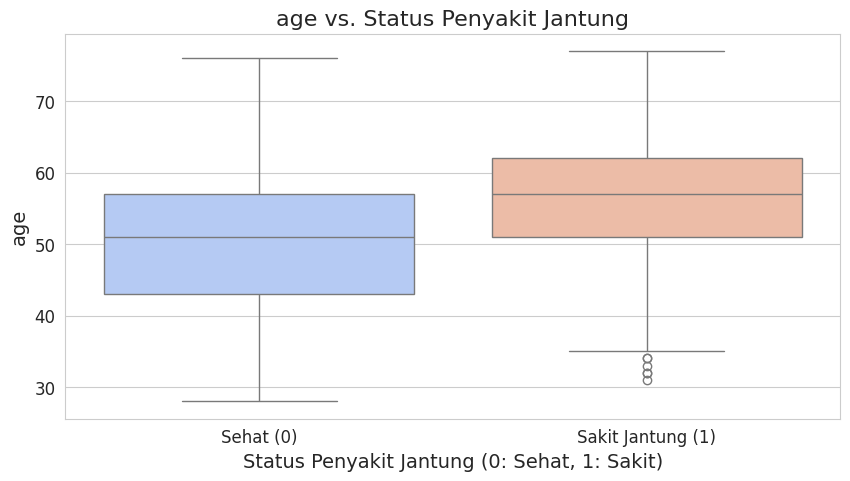

<ipython-input-45-344eeabc0682>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='coolwarm')


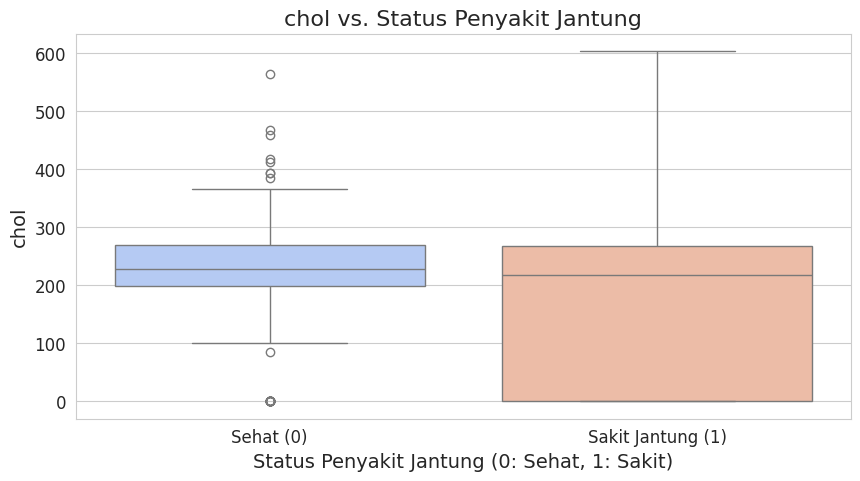


Fitur Kategorikal vs. Target:


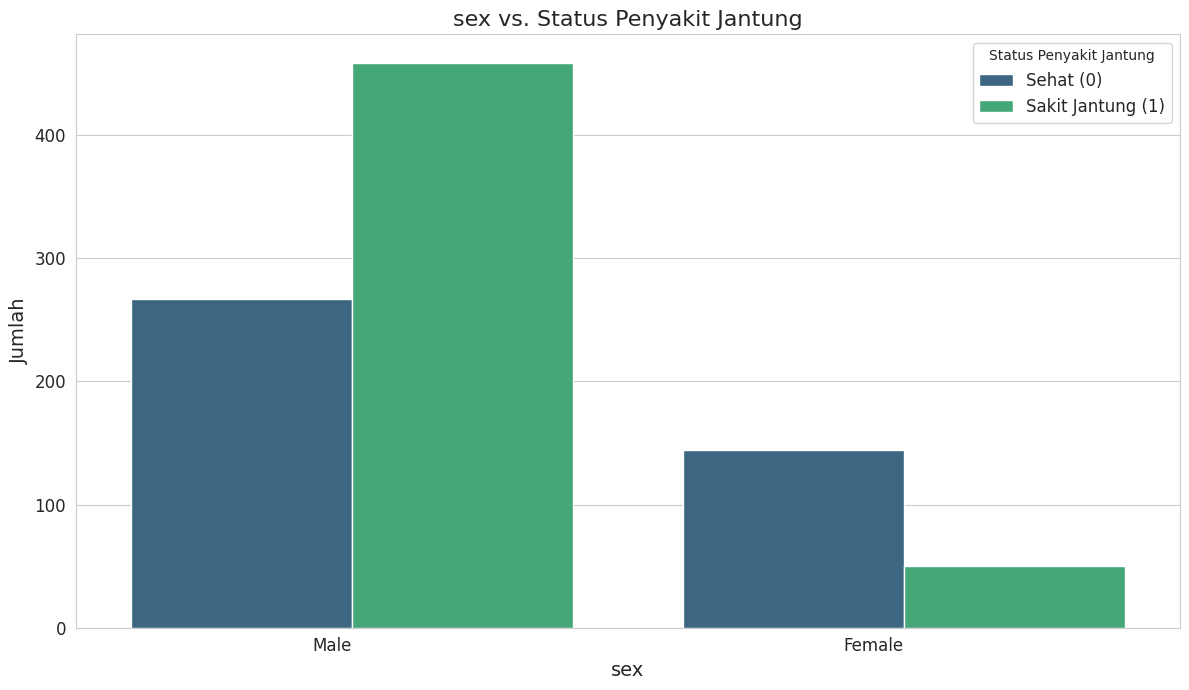

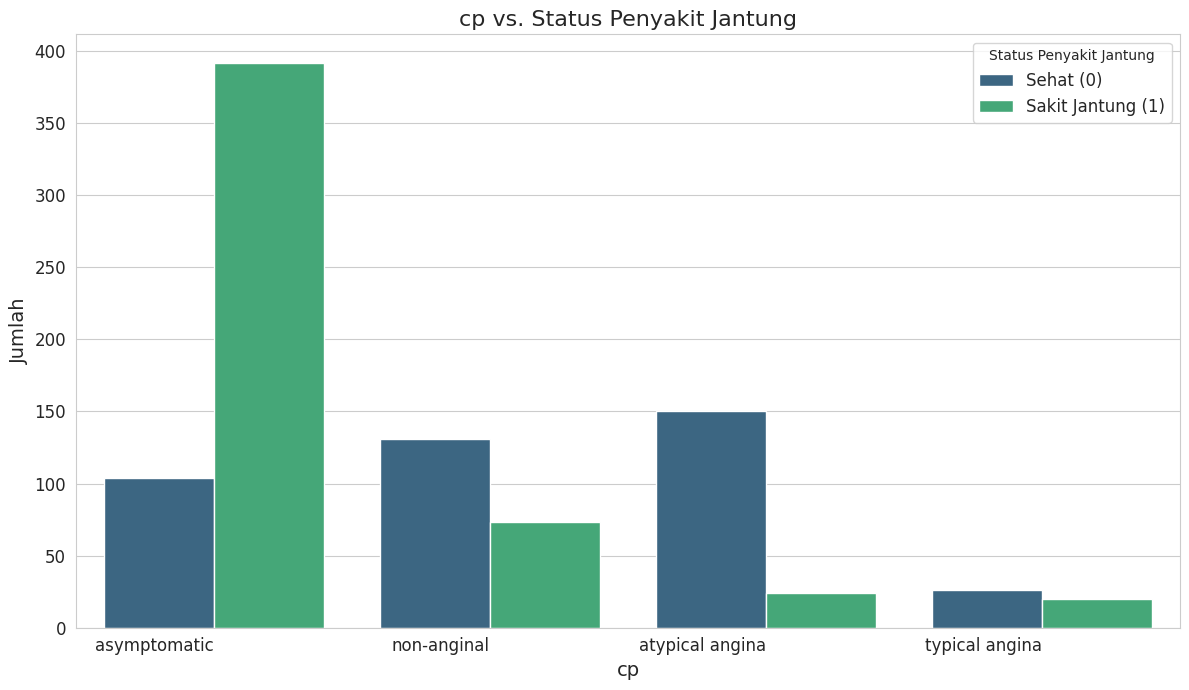

In [45]:
print("\n--- Analisis Bivariat (Fitur vs. Target) ---")
if 'target' in df.columns:
    if numerical_features_eda:
        print("\nFitur Numerik vs. Target:")
        for col in numerical_features_eda:
            if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
                plt.figure(figsize=(10, 5))
                sns.boxplot(x='target', y=col, data=df, palette='coolwarm')
                plt.title(f'{col} vs. Status Penyakit Jantung')
                plt.xlabel('Status Penyakit Jantung (0: Sehat, 1: Sakit)')
                plt.ylabel(col)
                plt.xticks([0, 1], ['Sehat (0)', 'Sakit Jantung (1)'])
                plt.show()

    if categorical_features_eda:
        print("\nFitur Kategorikal vs. Target:")
        for col in categorical_features_eda:
            if col in df.columns:
                plt.figure(figsize=(12, 7))
                order = df[col].value_counts().index
                sns.countplot(x=col, hue='target', data=df, palette='viridis', order=order)
                plt.title(f'{col} vs. Status Penyakit Jantung')
                plt.xlabel(col)
                plt.ylabel('Jumlah')
                plt.xticks(rotation=0, ha='right')
                plt.legend(title='Status Penyakit Jantung', labels=['Sehat (0)', 'Sakit Jantung (1)'])
                plt.tight_layout()
                plt.show()
else:
    print("Analisis Bivariat tidak dapat dilakukan karena kolom 'target' tidak ada.")


## Preprocessing Data

In [46]:
target_column_name = 'num'  # Asumsi kolom target adalah 'num'

df[target_column_name] = pd.to_numeric(df[target_column_name], errors='coerce')
df.dropna(subset=[target_column_name], inplace=True)
print(f"\nDataset setelah pembersihan:")
df.info()


Dataset setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
 16  target    920 non-null    int64  
dtypes: float64(5), int64(4), object(8)
memory usage: 122.3+ KB


In [52]:
df['target'] = (df[target_column_name] > 0).astype(int)
df_processed = df.drop(target_column_name, axis=1).copy()

numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

transformers_list = []
if numerical_features:
    numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                            ('scaler', StandardScaler())])
    transformers_list.append(('num', numerical_transformer, numerical_features))

if categorical_features:
    categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                               ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
    transformers_list.append(('cat', categorical_transformer, categorical_features))

preprocessor = ColumnTransformer(transformers=transformers_list, remainder='drop')


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
 16  target    920 non-null    int64  
dtypes: float64(5), int64(4), object(8)
memory usage: 122.3+ KB


In [53]:
X = df_processed.drop(columns='target')
y = df_processed['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [54]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [55]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.AUC(name='auc')])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,529 (56.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [57]:
early_stopping = EarlyStopping(monitor='val_auc', patience=25, mode='max', restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.00001, verbose=1)

history = model.fit(
    X_train_processed, y_train, epochs=200, batch_size=16,
    validation_data=(X_test_processed, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5229 - auc: 0.5367 - loss: 0.8986 - precision: 0.5669 - recall: 0.5209 - val_accuracy: 0.7772 - val_auc: 0.8658 - val_loss: 0.6071 - val_precision: 0.7699 - val_recall: 0.8529 - learning_rate: 0.0010
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7295 - auc: 0.7953 - loss: 0.5684 - precision: 0.7630 - recall: 0.7406 - val_accuracy: 0.8043 - val_auc: 0.8918 - val_loss: 0.5309 - val_precision: 0.7661 - val_recall: 0.9314 - learning_rate: 0.0010
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7428 - auc: 0.8196 - loss: 0.5394 - precision: 0.7623 - recall: 0.7812 - val_accuracy: 0.8152 - val_auc: 0.8998 - val_loss: 0.4790 - val_precision: 0.7787 - val_recall: 0.9314 - learning_rate: 0.0010
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7852 - auc: 0.8736 - loss: 0.4454 - precision: 0.7846 - recall: 0.8351 - val_accuracy: 0.7989 - val_auc: 0.9063 - val_loss: 0.4516 - val_pr

In [59]:
from sklearn.metrics import classification_report

# Evaluasi model
results = model.evaluate(X_test_processed, y_test, verbose=0)
print("\nHasil Evaluasi Model pada Data Uji:")
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

# Prediksi pada data uji
y_pred = (model.predict(X_test_processed) > 0.5).astype("int32")

# Tampilkan Classification Report
report = classification_report(y_test, y_pred, target_names=['Sehat (0)', 'Sakit Jantung (1)'])
print("\nClassification Report:")
print(report)



Hasil Evaluasi Model pada Data Uji:
loss: 0.3619
compile_metrics: 0.8533
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Classification Report:
                   precision    recall  f1-score   support

        Sehat (0)       0.89      0.77      0.82        82
Sakit Jantung (1)       0.83      0.92      0.87       102

         accuracy                           0.85       184
        macro avg       0.86      0.84      0.85       184
     weighted avg       0.86      0.85      0.85       184



In [60]:
model_filename = 'heart_disease_prediction_model.h5'
model.save(model_filename)
print(f"\nModel berhasil disimpan sebagai {model_filename}")


Model berhasil disimpan sebagai heart_disease_prediction_model.h5
